### LDA + ANN + XGB

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.datasets import load_wine

In [ ]:
data = pd.read_csv('/content/allData800 final (1).csv')

In [ ]:
X = data.drop('classification', axis=1)
y = data['classification']

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

In [ ]:
lda_df = pd.DataFrame(data=X_lda, columns=['LDA1'])

In [ ]:
new_df = pd.concat([lda_df, pd.DataFrame({'target': y})], axis=1)

In [ ]:
new_df.shape

(800, 2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
data =new_df

In [ ]:
data.head()

,LDA1,target
0,-1.103139,notckd
1,0.163913,notckd
2,1.188738,notckd
3,0.242945,notckd
4,0.568622,notckd


In [ ]:
data.describe()

,LDA1
count,8.000000e+02
mean,3.262945e-14
std,1.189147e+00
min,-2.951978e+00
25%,-1.103139e+00
50%,5.164429e-01
75%,7.858014e-01
max,2.196510e+00


In [ ]:
X = data['LDA1']
y = data['target']

In [ ]:
print(X.shape, y.shape)

(800,) (800,)


In [ ]:
y = y.map({'notckd': 0, 'ckd': 1})

In [ ]:
print(X.head)

<bound method NDFrame.head of 0     -1.103139
1      0.163913
2      1.188738
3      0.242945
4      0.568622
         ...   
795    0.638246
796   -0.053229
797   -0.003506
798    1.132156
799    0.571417
Name: LDA1, Length: 800, dtype: float64>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=1))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
9/9 [==============================] - 7s 30ms/step - loss: 0.6584 - accuracy: 0.6107 - val_loss: 0.6134 - val_accuracy: 0.8042
Epoch 2/15
9/9 [==============================] - 0s 9ms/step - loss: 0.6201 - accuracy: 0.7607 - val_loss: 0.5695 - val_accuracy: 0.8083
Epoch 3/15
9/9 [==============================] - 0s 8ms/step - loss: 0.5840 - accuracy: 0.7643 - val_loss: 0.5438 - val_accuracy: 0.8000
Epoch 4/15
9/9 [==============================] - 0s 9ms/step - loss: 0.5711 - accuracy: 0.7661 - val_loss: 0.5216 - val_accuracy: 0.8000
Epoch 5/15
9/9 [==============================] - 0s 13ms/step - loss: 0.5433 - accuracy: 0.7625 - val_loss: 0.5016 - val_accuracy: 0.8000
Epoch 6/15
9/9 [==============================] - 0s 13ms/step - loss: 0.5359 - accuracy: 0.7661 - val_loss: 0.4874 - val_accuracy: 0.8000
Epoch 7/15
9/9 [==============================] - 0s 12ms/step - loss: 0.5215 - accuracy: 0.7643 - val_loss: 0.4776 - val_accuracy: 0.7958
Epoch 8/15
9/9 [==============

In [ ]:
ann_features_train = ann_model.predict(X_train)
ann_features_test = ann_model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
print(ann_features_train.shape, ann_features_test.shape)

(560, 1) (240, 1)


In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(ann_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_predictions = xgb_model.predict(ann_features_test)

In [ ]:
accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Model Accuracy:", accuracy)

XGBoost Model Accuracy: 0.7125


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)
roc_auc = roc_auc_score(y_test, xgb_predictions)
confusion = confusion_matrix(y_test, xgb_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)

Precision: 0.5981308411214953
Recall: 0.7111111111111111
F1 Score: 0.6497461928934011
AUC-ROC Score: 0.7122222222222223
Confusion Matrix:
 [[107  43]
 [ 26  64]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(ann_features_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
best_xgb_model = grid_search.best_estimator_

In [ ]:
xgb_predictions = best_xgb_model.predict(ann_features_test)

In [ ]:
accuracy = accuracy_score(y_test, xgb_predictions)
print("Tuned XGBoost Model Accuracy:", accuracy)

Tuned XGBoost Model Accuracy: 0.7958333333333333


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_xgb_model, ann_features_test, y_test, cv=5)
print(np.mean(scores))
print(scores)

0.7833333333333333
[0.79166667 0.8125     0.75       0.8125     0.75      ]


In [ ]:
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)
roc_auc = roc_auc_score(y_test, xgb_predictions)
confusion = confusion_matrix(y_test, xgb_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)

Precision: 0.7971014492753623
Recall: 0.6111111111111112
F1 Score: 0.6918238993710693
AUC-ROC Score: 0.7588888888888888
Confusion Matrix:
 [[136  14]
 [ 35  55]]


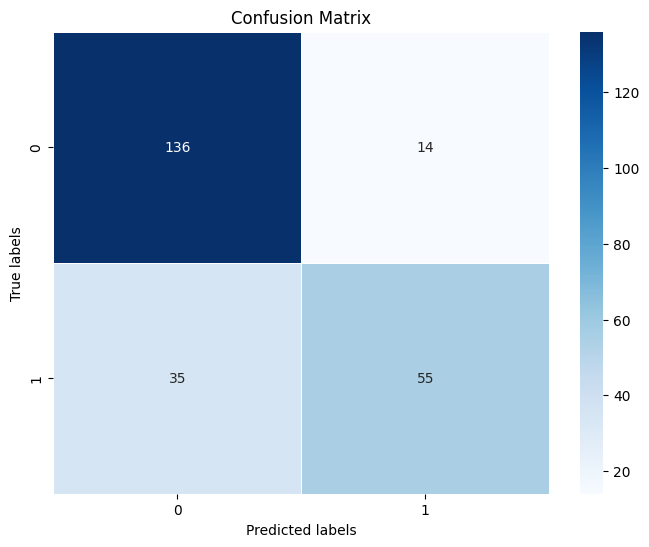

In [ ]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

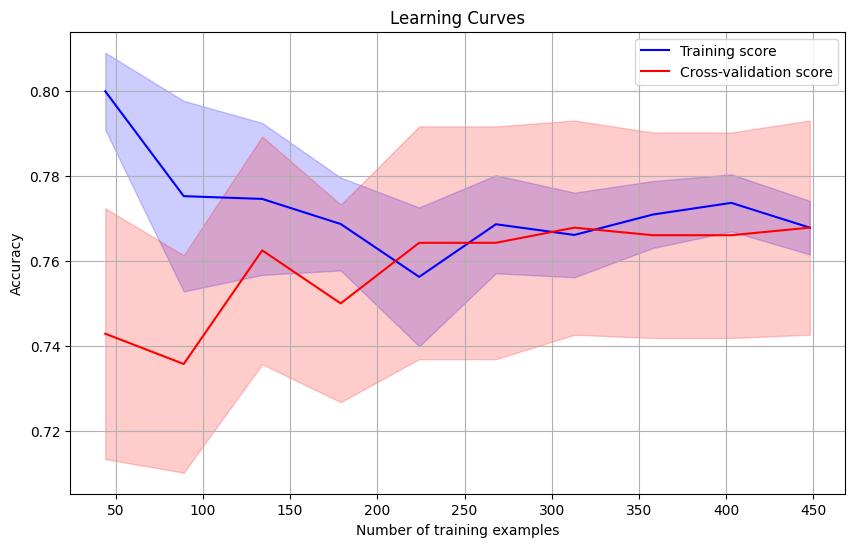

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, ann_features_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curves')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()